In [1]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas

You should consider upgrading via the 'c:\users\jojo\jupyter\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\jojo\jupyter\scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In linear regression, we are creating a linear function to calculate value $f(x)$ for a given $x$.  To find $f(x)$, we are given sample values of $x$ and $y$.  We want our $f(x)$ to be very close to $y$ for every value of $x$.  The hope is that for any other values of $x$ not in the sample, $f(x)$ would predict the correct value of $y$.

The equation is just like any linear equation, in the form of

$$
f(x) = mx + b
$$

But in linear-regression-speak, we write

$$
h_\theta(x) = \theta_0 + \theta_1x
$$

(this is not complete as we will see later, but it is easier to understand for now)

The steps of linear regression are

1. Pick some $\theta_{0}$ and $\theta_{1}$
2. Calculate $h_{\theta}(x)$ for every given sample of $x$
3. Compare the calculated value with the actual value.  Calculate the overall error level (known as cost function $J$)
   by using
   $$
     \frac12\sum_{i=1}^m(h_\theta(x)^{(i)} - y^{(i)})^2
   $$
   where    
   - $m$ is the number of training samples
   - $y$ is the actual value of training sample for a given $x$
   - $i$ is the index of the training sample
   - $x^{(i)}$ is the $x$ of the the training sample of index $i$
   - $j$ is the index of the input variable
   - $n$ is the number of input variabls per training sample
4. Minimize the cost function $J$

Start with a riduculous example of something even simpler, where we only have $\theta_0$.  This means our $x$ has no purpose:
$$
h_\theta = \theta_0
$$
Let's say our training set is

|x |y |
|--|--|
|0 |5 |
|1 |5 |
|2 |5 |

This means

- $m$ is 3
- $i$ goes from 1 to 3 (or maybe 0 to 2 in Python world)
- $n$ is 0

In [6]:
training_x = np.array([0, 1, 2])
training_y = np.array([5, 5, 5])

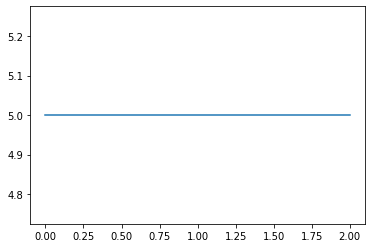

In [7]:
plt.plot(training_x, training_y)

And let's say we start with $\theta_0=0$

Our hypothesis would be

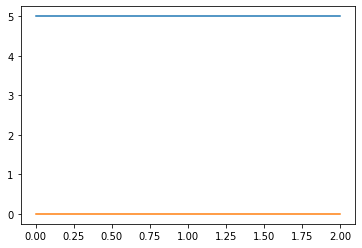

In [8]:
# we are using 0 * training_x just so we end up with an array, even though
# we said our hypothesis does not depend on x
def hypothesis_theta(theta):
    return theta + 0 * training_x

hypothesis = hypothesis_theta(0)
hypothesis
# visually, we can see our training set at 5 while our hypothesis is at 0
plt.plot(training_x, training_y)
plt.plot(training_x, hypothesis)

Our cost $J$ is

In [29]:
def cost(hypothesis):
    return np.sum((hypothesis - training_y) ** 2) / 2
cost(hypothesis)

37.5

And before we start doing our gradient descent to find minimum cost $J$, let's just plot $\theta_0$ vs $J$.

In [30]:
# theta 0
hypothesis_theta_0 = hypothesis_theta(0)
cost_theta_0 = cost(hypothesis_theta_0)
cost_theta_0

37.5

In [31]:
# theta 1
hypothesis_theta_1 = hypothesis_theta(1)
cost_theta_1 = cost(hypothesis_theta_1)
cost_theta_1

24.0

And so on... but to make it easier:

In [32]:
# try calculating cost for theta from 0 to 9
theta_list = np.arange(0, 10, 1)

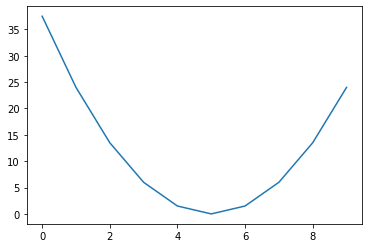

In [33]:
plt.plot(theta_list, [cost(hypothesis_theta(theta)) for theta in theta_list])

And as seen here, we have minimum cost at $\theta_0 = 5$

But if we start from $\theta_0 = 0$, how do we get to 5?

To understand this, we can look at the instantaneous slope (derivative) of the cost at $\theta_0$.  If the slope is negative, we need to increase $\theta_0$, and if the slope is positive, we need to increase $\theta_0$.  Not only that, the amount to increase is proportional to the slope.  The proportion, in our case, is the learning rate $\alpha$.

We can get closer to the correct $\theta_0$ by the gradient descent formula

$$
\theta_0 = \theta_0 - \alpha\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_0
$$

where:
- $x_0$ is 1 (so that $\theta_0x$ = $\theta_0$)
- $\alpha$ is the learning rate so we don't overshoot

In [34]:
# so let's start over again
# we have theta0 = 0
cost(hypothesis_theta(0))

37.5

In [36]:
def slope(hypothesis):
    return np.sum((hypothesis - training_y) * 1)

learning_rate_alpha = 0.1

def gradient_descent(theta):
    return theta - learning_rate_alpha * slope(hypothesis_theta(theta))

gradient_descent(0)

1.5

We have a new theta, so we can calculate our cost again.

In [16]:
cost(hypothesis_theta(1.5))

18.375

Of course our cost is high; the correct theta is 5.
And since our cost is still high, we repeat.

In [17]:
gradient_descent(1.5)

2.55

In [18]:
gradient_descent(2.55)

3.285

This will take while, so let our computer do this:

In [19]:
def find_minimum():
    theta = 10
    iteration = 0
    acceptable_cost = 0.001
    current_cost = cost(hypothesis_theta(theta))
    while current_cost > acceptable_cost and iteration < 100:
        theta = gradient_descent(theta)
        current_cost = cost(hypothesis_theta(theta))
        print((theta, current_cost))
        iteration += 1
    return (theta, cost)

In [20]:
find_minimum()

(8.5, 18.375)
(7.45, 9.003750000000002)
(6.715, 4.411837499999999)
(6.2005, 2.161800375)
(5.84035, 1.0592821837499997)
(5.588245, 0.5190482700374994)
(5.4117714999999995, 0.2543336523183744)
(5.28824005, 0.12462348963600353)
(5.201768035, 0.06106550992164168)
(5.1412376244999995, 0.02992209986160431)
(5.09886633715, 0.014661828932186084)
(5.0692064360049995, 0.007184296176771144)
(5.048444505203499, 0.0035203051266178226)
(5.03391115364245, 0.001724949512042742)
(5.023737807549715, 0.0008452252609009435)


(5.023737807549715, <function __main__.cost(hypothesis)>)

For fun, set initial theta to a number greater than 5 and see our algorithm moving it down to 5.

Also for fun, try a large $\alpha$ and see our algorithm hopping back and forth around 5.